In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import spinmob as sm
import mcphysics as mphys
from scipy.optimize import curve_fit

1.2793916926792486
57.70055825157549
[  0.38537863 -14.14812295]
[0.00538958 4.10098099]
0.00044352314651371715
[666.30541292 299.76420001 123.60612848 516.7369445 ]


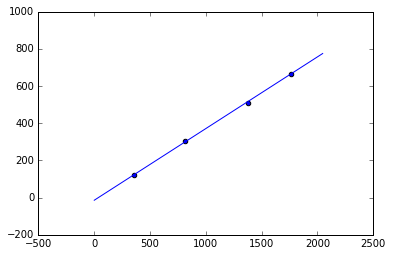

In [15]:
#Adds together 1 hour of calibration data for a given source
def Sum(source):
    yData = [0]*2048
    i=1
    j=0
    while i <= 12:
        while j < 10:
            yData += mphys.data.load_chn('Calibration/' + source + '/' + str(i) + '/' + source + '/' + source + 
                                         ' 00' + str(j) + '.Chn')[1]
            j += 1
        i += 1
    return yData

#Gaussian, where m=peak, o=standard deviation, A=amplitude, B=Linear Coeff., C=Linear Offset
def Gaussian(x, m, o, A, B, C):
    return A*np.exp(-0.5*(((x-m)/o)**2)) + B*x + C

#Function for linear curve-fit of peaks for each channel (i.e. for final callibration curve)
def Linear(x, a, b):
    return a*x+b

#Curve fits a Gaussian to a given emitter's callibration data curve. The interval determines the width of data
#which the Gaussian fits around. 
def Fit(input_databox, interval, guess):
    xData = np.arange(0, 2048)
    param, cov = curve_fit(Gaussian, xData[guess-interval:guess+interval], 
                           input_databox[guess-interval:guess+interval], p0=[guess, 10, 10, 10, 10])
    error = np.sqrt(np.diag(cov))
#    print(param), print(error)
    return [param, error]

def Chi(fitparam, input_databox, interval, guess):
    index = np.arange(guess-interval, guess+interval)
    fit = Gaussian(index, *fitparam)
    out = ((input_databox[guess-interval: guess+interval]-fit)**2/(input_databox[guess-interval: guess+interval])**2)
    return np.sum(out[out < 10**10])

def ChiLinear(fitparam, x, y):
    fit = Linear(x, *fitparam)
    return np.sum((y-fit)**2/y**2)

Cs = Fit(Sum('Cs-137'), 200, 1742)
Ba = Fit(Sum('Ba-133'), 200, 850)
Co = Fit(Sum('Co-57'), 200, 375)
Na = Fit(Sum('Na-22'), 200, 1360)

print(Chi(Cs[0], Sum('Cs-137'), 50, int(Cs[0][0])))

yvalues = [662.1, 302.85, 122, 511.0]
xvalues = [Cs[0][0], Ba[0][0], Co[0][0], Na[0][0]]
errvalues = [Cs[0][1], Ba[0][1], Co[0][1], Na[0][1]]

linearFit_par, linearFit_cov = curve_fit(Linear, xvalues, yvalues, sigma = errvalues)

plt.plot(np.arange(0, 2048), Linear(np.arange(0, 2048), *linearFit_par))
plt.scatter(xvalues, yvalues)
print(Cs[0][1])
print(linearFit_par), print(np.sqrt(np.diag(linearFit_cov)))
print(ChiLinear(linearFit_par, np.asarray(xvalues), np.asarray(yvalues)))
print(Linear(np.asarray(xvalues), *linearFit_par))

In [ ]:
residuals = 

fig, ax = plt.subplots(2, 1, sharey='row', tight_layout = True, gridspec_kw={'height_ratios':[4,1]}, figsize=(15,7))

ax[0].plot(callibrationData[0][1542:1942], Gaussian(callibrationData[0][1542:1942], *fitParam),
           label='Gaussian Fit', color='darkred', linewidth=3)
ax[0].errorbar(callibrationData[0][1542:1942], callibrationData[1][1542:1942], fmt='o',
               yerr=callibrationData[3][1542:1942], label='Data', color='darkseagreen')
ax[1].errorbar(callibrationData[0][1542:1942], residuals[1542:1942], 
               fmt='o', yerr=callibrationData[3][1542:1942], color='darkseagreen')

ax[1].set_xlabel('Channel Number')
ax[1].set_ylabel('Studentized Residuals')
ax[0].set_ylabel('Counts')
ax[0].legend(loc='upper right', prop={'size':16})

plt.tight_layout()